# 4.10 Coding Etiquette & Excel Reporting 

Table of Contents:
1. Importing Libraries and Data
2. PII Data Removal
3. Creating Region Column 
4. Creating exclusion flag for low-activity customer
5. Importing departments dataframe and merging to main dataframe
6. Creating Age Groupings, Income Brackets variables, familial status, most popular departments
7. Crosstabs
8. Aggregating max, mean, and min variables on a customer-profile levels
9. Customers by region and department
10. Answering Key Questions

# 1. Importing Libraries and Data 

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [22]:
# Assigning path

path =  r'Users\peter\Documents\Instacart Basket Analysis 2022'

In [23]:
# Importing ords_prods_cust_merged dataframe


ords_prods_cust_merged = pd.read_pickle(r'C:\Users\peter\Documents\Instacart Basket Analysis 2022\02 Data\Prepared Data\ords_prods_cust_merged.pkl')

In [24]:
# Consider any security implications that might exist for this new data. 
# You’ll need to address any PII data in the data before continuing your analysis.

 # 2. PII Data Removal

In [25]:
pd.set_option('display.max_columns', None)
ords_prods_cust_merged.head()

,order_id,user_id,order_number,orders_days_of_week,order_time,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,Busiest_day,busiest_period_of_day,Busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,fam_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,NaN,Average_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity


In [26]:
# first_name and surname variables are within the dataset and need to be removed due to concerns with privacy data

In [8]:
# Removing PII Data
ords_prods_cust_merged = ords_prods_cust_merged.drop(columns = ['first_name','surname'])

In [27]:
# Confirming removal of PII Data
pd.set_option('display.max_columns', None)
ords_prods_cust_merged.head()

,order_id,user_id,order_number,orders_days_of_week,order_time,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,Busiest_day,busiest_period_of_day,Busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,fam_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,NaN,Average_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity


In [28]:
# Checking shape of dataframe
ords_prods_cust_merged.shape

(32406041, 35)

In [29]:
# The Instacart officers are interested in comparing customer behavior in different geographic areas. 
# Create a regional segmentation of the data. 
# You’ll need to create a “Region” column based on the “State” column from your customers data set.

# 3. Creating Region Column

In [12]:
# Creating Region column based on Wikipedia link: https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States 
Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','New Jersey','Pennsylvania']
Midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [13]:
# Adding Region column to my dataframe

cond=[ords_prods_cust_merged['state'].isin(Northeast),ords_prods_cust_merged['state'].isin(Midwest),ords_prods_cust_merged['state'].isin(South),ords_prods_cust_merged['state'].isin(West)]
values=['Northeast','Midwest','South','West']
ords_prods_cust_merged['region']=np.select(cond,values)

In [30]:
# Checking whether Region column was added to dataframe 

pd.set_option('display.max_columns', None)
ords_prods_cust_merged.head()

,order_id,user_id,order_number,orders_days_of_week,order_time,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,Busiest_day,busiest_period_of_day,Busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,fam_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,NaN,Average_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity


In [31]:
# Checking shape of dataframe
ords_prods_cust_merged.shape

(32406041, 35)

In [32]:
# Determine whether there’s a difference in spending habits between the different U.S. regions. 
# (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [33]:
# Creating crosstab
crosstab = pd.crosstab(ords_prods_cust_merged['region'], ords_prods_cust_merged['spending_flag'], dropna = False)

In [34]:
# Check results of crosstab
crosstab

spending_flag,High_Spender,Low_Spender
region,,
Midwest,155979,7441606
Northeast,108226,5614713
South,209693,10582607
West,160354,8132863


At first glance, spending habits seem like they may be more significant within the South region. However, this region also has a much higher population. Running some simple calculations shows that the differences are in fact minimal and high spenders account for approximately 2 percent of spending in all regions, with low spenders accounting for approximately 98 percent. 

In [35]:
#The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. 
#Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 
#Make sure you export this sample.

# 4. Creating exclusion flag for low-activity customers

In [20]:
# Creating exclusion flag for low-activity for orders < 5

ords_prods_cust_merged.loc[ords_prods_cust_merged['max_order'] < 5, 'exclusion_flag'] = 'low_activity'

In [21]:
# Creating exclusion flag for normal activity for all orders > 5

ords_prods_cust_merged.loc[ords_prods_cust_merged['max_order'] >= 5, 'exclusion_flag'] = 'normal_activity'

In [36]:
# Checking exclusion flags

ords_prods_cust_merged['exclusion_flag'].value_counts(dropna = False)

normal_activity    30965686
low_activity        1440355
Name: exclusion_flag, dtype: int64

In [37]:
# Checking dataframe columns output
pd.set_option('display.max_columns', None)
ords_prods_cust_merged.head()

,order_id,user_id,order_number,orders_days_of_week,order_time,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,Busiest_day,busiest_period_of_day,Busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,fam_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,NaN,Average_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity


In [38]:
# Checking dataframe top 3000 to check exclusion flags
pd.set_option('display.max_columns', None)
ords_prods_cust_merged.head(3000)

,order_id,user_id,order_number,orders_days_of_week,order_time,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,Busiest_day,busiest_period_of_day,Busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,fam_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,NaN,Average_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2369966,290,35,6,10,6.0,False,42895,3,1,Filets In Sauce New York Strip Flavor Dog Food,40,8,4.9,both,Low-range product,Regularly busy,Regularly busy,NaN,Most_orders,51,Loyal customer,7.285597,Low_Spender,7.0,Frequent customer,Female,Michigan,24,5/18/2019,1,married,55550,Midwest,normal_activity
2996,270626,290,36,6,8,7.0,False,42895,6,1,Filets In Sauce New York Strip Flavor Dog Food,40,8,4.9,both,Low-range product,Regularly busy,Regularly busy,NaN,Average_orders,51,Loyal customer,7.285597,Low_Spender,7.0,Frequent customer,Female,Michigan,24,5/18/2019,1,married,55550,Midwest,normal_activity
2997,1413472,290,37,5,10,6.0,False,42895,2,1,Filets In Sauce New York Strip Flavor Dog Food,40,8,4.9,both,Low-range product,Regularly busy,Regularly busy,NaN,Most_orders,51,Loyal customer,7.285597,Low_Spender,7.0,Frequent customer,Female,Michigan,24,5/18/2019,1,married,55550,Midwest,normal_activity
2998,1707633,290,38,6,10,8.0,False,42895,4,1,Filets In Sauce New York Strip Flavor Dog Food,40,8,4.9,both,Low-range product,Regularly busy,Regularly busy,NaN,Most_orders,51,Loyal customer,7.285597,Low_Spender,7.0,Frequent customer,Female,Michigan,24,5/18/2019,1,married,55550,Midwest,normal_activity


In [39]:
# Exporting 'ords_prods_cust_merged' as pickle format 

ords_prods_cust_merged.to_pickle(r'C:\Users\peter\Documents\Instacart Basket Analysis 2022\02 Data\Prepared Data\ords_prods_cust_merged.pkl')

In [40]:
# The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different 
#products and are, thus, curious about customer profiling in their database. 

#Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 
#You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact 
#customer profiles. 

#(Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

Looking at my dataset, I realize that department_id is included.
However there is no clear definition or department_name variable to indicate which goods or which department fall under department_id. Thus, I will import the department_id dataframe and then include the variable for department_name


In [41]:
ords_prods_cust_merged.dtypes

order_id                     int64
user_id                     object
order_number                 int64
orders_days_of_week          int64
order_time                   int64
days_since_prior_order     float64
first_order                   bool
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
_merge                    category
price_range_loc             object
busiest_day                 object
Busiest_day                 object
busiest_period_of_day       object
Busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
spending                   float64
spending_flag               object
frequency                  float64
frequency_flag              object
gender                      object
state                       object
age                 

# 5. Importing departments dataframe and merging to main dataframe

In [43]:
#Importing departments dataframe 
#Using path import was not working for some reason(?) Departments dataframe was wrangled in a previous exercise.

departments = pd.read_csv(r'C:\Users\peter\Documents\Instacart Basket Analysis 2022\02 Data\Prepared Data\departments_wrangled.csv', index_col = False)


In [44]:
departments.head(30)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [45]:
# For some reason my imported prepared data is not flowing in correctly? 
# It was transposed in Task 4.4, and I am loading in the prepared data. 

In [46]:
departments.dtypes

Unnamed: 0     int64
department    object
dtype: object

In [47]:
departments_2 = departments.rename(columns = {"Unnamed: 0" : "department_id"})

In [48]:
departments_2

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [49]:
departments_2.dtypes

department_id     int64
department       object
dtype: object

In [110]:
final_data = ords_prods_cust_merged.merge(departments_2, on = ['department_id'], how = 'left', indicator = 'Check_join')

MemoryError: Unable to allocate 3.14 GiB for an array with shape (13, 32406041) and data type int64

In [111]:
# Due to error message above, I ended up taking a smaller portion of the main dataframe in hopes of being able to merge.
# A sample size of 1,000,000 should still provide useful statistics to assess who the average customers are and still allow for accurate customer profiling. 


ords_prods_cust_merged = ords_prods_cust_merged [:1000000]

In [112]:
final_data = ords_prods_cust_merged.merge(departments_2, on = ['department_id'], how = 'left', indicator = 'Check_join')

In [113]:
final_data

,order_id,user_id,order_number,orders_days_of_week,order_time,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,Busiest_day,busiest_period_of_day,Busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,fam_status,income,region,exclusion_flag,department,Check_join
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,NaN,Average_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,beverages,both
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,beverages,both
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,beverages,both
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,beverages,both
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,beverages,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,3084444,176637,2,3,21,30.0,False,47766,3,1,Organic Avocado,24,4,6.3,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,5,New customer,8.180645,Low_Spender,30.0,Non-frequent customer,Male,New Hampshire,36,3/3/2020,1,married,56191,Northeast,normal_activity,produce,both
999996,3084444,176637,2,3,21,30.0,False,24852,4,0,Banana,24,4,12.3,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,5,New customer,8.180645,Low_Spender,30.0,Non-frequent customer,Male,New Hampshire,36,3/3/2020,1,married,56191,Northeast,normal_activity,produce,both
999997,2586117,176637,4,0,20,30.0,False,24852,7,1,Banana,24,4,12.3,both,Mid-range product,Busiest day,Busiest_days,NaN,Most_orders,5,New customer,8.180645,Low_Spender,30.0,Non-frequent customer,Male,New Hampshire,36,3/3/2020,1,married,56191,Northeast,normal_activity,produce,both
999998,2179481,176637,5,0,14,30.0,False,24852,1,1,Banana,24,4,12.3,both,Mid-range product,Busiest day,Busiest_days,NaN,Most_orders,5,New customer,8.180645,Low_Spender,30.0,Non-frequent customer,Male,New Hampshire,36,3/3/2020,1,married,56191,Northeast,normal_activity,produce,both


In [50]:
final_data.head(1000)

,order_id,user_id,order_number,orders_days_of_week,order_time,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,Busiest_day,busiest_period_of_day,Busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,fam_status,income,region,exclusion_flag,department,Check_join,Generation,Income Bracket
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,NaN,Average_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,beverages,both,Millenials 25-40,Middle 40k-74k
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,beverages,both,Millenials 25-40,Middle 40k-74k
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,beverages,both,Millenials 25-40,Middle 40k-74k
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,beverages,both,Millenials 25-40,Middle 40k-74k
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Most_orders,10,New customer,6.367797,Low_Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,beverages,both,Millenials 25-40,Middle 40k-74k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1268191,52,15,2,11,8.0,False,196,3,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,NaN,Most_orders,27,Regular customer,6.356287,Low_Spender,8.0,Frequent customer,Female,Alabama,64,1/30/2018,2,married,40974,South,normal_activity,beverages,both,Boomers 57-75,Middle 40k-74k
996,1122089,52,17,2,10,6.0,False,196,4,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,NaN,Most_orders,27,Regular customer,6.356287,Low_Spender,8.0,Frequent customer,Female,Alabama,64,1/30/2018,2,married,40974,South,normal_activity,beverages,both,Boomers 57-75,Middle 40k-74k
997,1498922,52,18,2,10,14.0,False,196,6,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,NaN,Most_orders,27,Regular customer,6.356287,Low_Spender,8.0,Frequent customer,Female,Alabama,64,1/30/2018,2,married,40974,South,normal_activity,beverages,both,Boomers 57-75,Middle 40k-74k
998,180919,52,19,3,8,8.0,False,196,4,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest_days,NaN,Average_orders,27,Regular customer,6.356287,Low_Spender,8.0,Frequent customer,Female,Alabama,64,1/30/2018,2,married,40974,South,normal_activity,beverages,both,Boomers 57-75,Middle 40k-74k


In [51]:
final_data.shape

(1000000, 39)

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [52]:
# Based on the above, I will create various age groupings
# Will create income brackets such as low, middle, high, wealthy, top 1 percent
# Fam_status already includes four groupins of single, married, divorced, living with parents/siblings
# Can create a visual to see what the most popular departments are within the final dataframe 

# 6. Creating Age Groupings, Income Brackets variables, familial status, most popular departments

In [53]:
final_data['department'].value_counts()

produce            192805
beverages          169198
snacks             146154
dairy eggs         132249
frozen              62040
pantry              55862
bakery              38745
household           37572
breakfast           31569
canned goods        24380
deli                21604
dry goods pasta     20328
meat seafood        17404
personal care       15219
alcohol             14172
babies               5995
international        5473
pets                 5101
other                1538
missing              1368
bulk                 1224
Name: department, dtype: int64

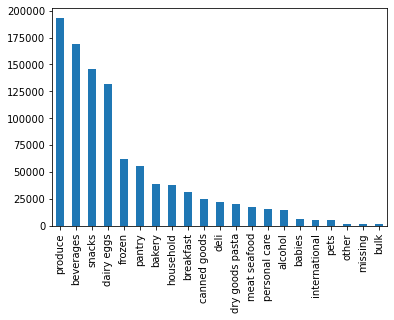

In [54]:
bar = bar_top_departments = final_data['department'].value_counts().plot.bar()

In [55]:
# Exporting bar chart figure

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_top_departments.png'))

FileNotFoundError: [Errno 2] No such file or directory: 'Users\\peter\\Documents\\Instacart Basket Analysis 2022\\04 Analysis\\Visualizations\\bar_top_departments.png'

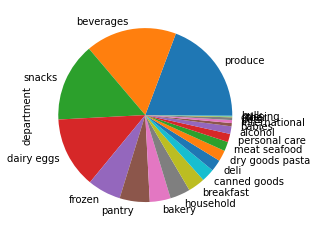

In [135]:
pie = pie_top_departments = final_data['department'].value_counts().plot.pie()

In [136]:
# Exporting pie chart figure

pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_top_departments.png'))

Top four departments for sales are produce, beverages, snacks, and dairy eggs. 

In [153]:
# How many unique customers based on age group? 
final_data.groupby('Generation')['user_id'].nunique()

Generation
Boomers 57-75             2027
Ge X 41-56                1728
Gen Z 18-24                743
Millenials 25-40          1688
Silent Generation > 75     685
Name: user_id, dtype: int64

In [154]:
# Creating Age Groups
# The below generation groupins are based on https://en.wikipedia.org/w/index.php?title=File:Generation_timeline.svg&lang=simple

final_data.loc[(final_data['age'] >= 18) & (final_data['age'] <= 24), 'Generation'] = 'Gen Z 18-24'
final_data.loc[(final_data['age'] >= 25) & (final_data['age'] <= 40), 'Generation'] = 'Millenials 25-40'
final_data.loc[(final_data['age'] >= 41) & (final_data['age'] <= 56), 'Generation'] = 'Ge X 41-56'
final_data.loc[(final_data['age'] >= 57) & (final_data['age'] <= 75), 'Generation'] = 'Boomers 57-75'
final_data.loc[final_data['age'] > 75, 'Generation'] = 'Silent Generation > 75'


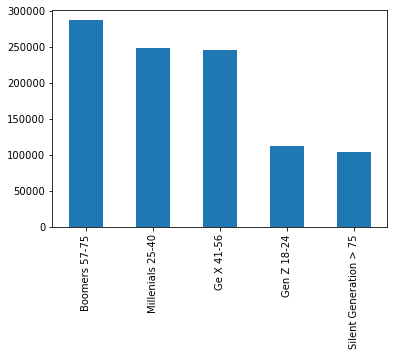

In [155]:
#Bar chart of customers by age groupings 

Generation_bar = final_data['Generation'].value_counts().plot.bar()

In [156]:
Generation_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_groups_bar.png'))

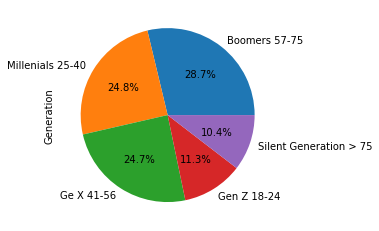

In [157]:
#Creating pie chart by age groups

Generation_pie = final_data['Generation'].value_counts().plot.pie(autopct='%1.1f%%')

In [158]:
Generation_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_groups_pie.png'))

In [199]:
# Creating Income Brackets

final_data.loc[(final_data['income'] >= 0) & (final_data['income'] < 40000), 'Income Bracket'] = 'Low < 40k'
final_data.loc[(final_data['income'] >= 40000) & (final_data['income'] < 75000), 'Income Bracket'] = 'Middle 40k-74k'
final_data.loc[(final_data['income'] >= 75000) & (final_data['income'] < 100000), 'Income Bracket'] = 'Upper 75k-99k'
final_data.loc[(final_data['income'] >= 100000) & (final_data['income'] < 170000), 'Income Bracket'] = 'Wealthy 100k-169k'
final_data.loc[final_data['income'] > 170000, 'Income Bracket'] = 'Top 10 percent 170k+'

In [200]:
# How many unique customers based on income bracket?

final_data.groupby('Income Bracket')['user_id'].nunique()

Income Bracket
Low < 40k               1076
Middle 40k-74k          2383
Top 10 percent 170k+      68
Upper 75k-99k           1044
Wealthy 100k-169k       2300
Name: user_id, dtype: int64

In [201]:
# The above output shows that the majority of users are middle class or wealthy, with a small minority of the top 10% of earners

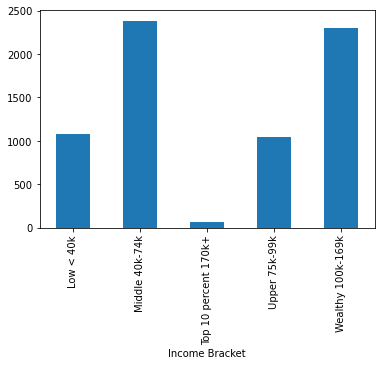

In [202]:
#Bar chart of customers by income

Income_bracket_bar = final_data.groupby('Income Bracket')['user_id'].nunique().plot.bar()

In [203]:
Income_bracket_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_bracket_bar.png'))

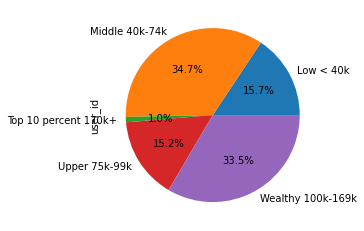

In [204]:
Income_bracket_pie = final_data.groupby('Income Bracket')['user_id'].nunique().plot.pie(autopct='%1.1f%%')

In [205]:
Income_bracket_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_bracket_pie.png'))

In [206]:
# Based on the above pie chart, we can clearly see that the majority of users (customers) are middle class or wealthy.
# The top 10 % of users only account for 1% of the customer base. 

In [207]:
# Observing the number of customers based on their family status

final_data.groupby('fam_status')['user_id'].nunique()

fam_status
divorced/widowed                     600
living with parents and siblings     337
married                             4829
single                              1105
Name: user_id, dtype: int64

In [208]:
# The overwhelming majority of users are married - over 70%! 

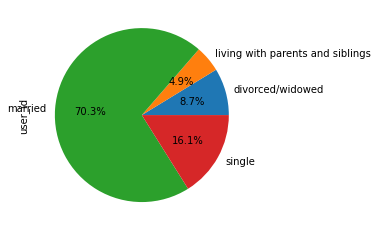

In [209]:
# Creating pie chart of family status

Income_bracket_famstatus_pie = final_data.groupby(['fam_status'])['user_id'].nunique().plot.pie(autopct='%1.1f%%')

In [210]:
Income_bracket_famstatus_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_famstatus_pie.png'))

# 7. Crosstabs and Analysis

In [211]:
# Crosstab using department and by age group

dept_age_crosstab = pd.crosstab(final_data['department'], final_data['Generation'], dropna = False)

In [212]:
print(dept_age_crosstab)

Generation       Boomers 57-75  Ge X 41-56  Gen Z 18-24  Millenials 25-40  \
department                                                                  
alcohol                   3557        4041         1573              3352   
babies                    1671        1599          931              1197   
bakery                   11395        8936         4545              9902   
beverages                49405       44192        17776             40823   
breakfast                 9033        7712         3819              7733   
bulk                       330         331          102               341   
canned goods              6895        6032         2836              6035   
dairy eggs               38459       31645        14693             34702   
deli                      6116        4534         2855              5793   
dry goods pasta           5868        4773         2184              5171   
frozen                   17873       14775         6811             15618   

NameError: name 'plot' is not defined

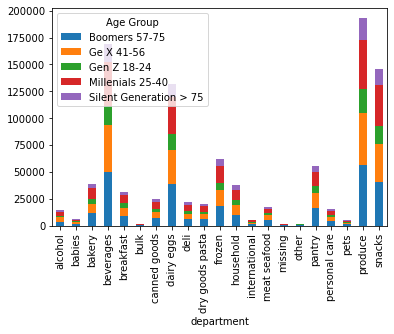

In [213]:
dept_age_crosstab_bar = dept_age_crosstab.plot.bar(stacked = True) 
plt.legend(title = 'Age Group', loc = 'upper left') 
plot.tight_layout()

In [214]:
# Export crosstab age group and department

dept_age_crosstab_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_age_crosstab.png'))

In [215]:
# Crosstab using family status and department

dept_fam_crosstab = pd.crosstab(final_data['department'], final_data['fam_status'], dropna = False)

In [216]:
print(dept_fam_crosstab)

fam_status       divorced/widowed  living with parents and siblings  married  \
department                                                                     
alcohol                      1523                               575     9695   
babies                        559                               281     3804   
bakery                       3774                              1797    27213   
beverages                   15348                              7960   118640   
breakfast                    2363                              1777    22378   
bulk                           62                                49      889   
canned goods                 2427                              1086    17036   
dairy eggs                  12475                              6465    91980   
deli                         1947                              1139    15349   
dry goods pasta              1728                               870    14511   
frozen                       5819       

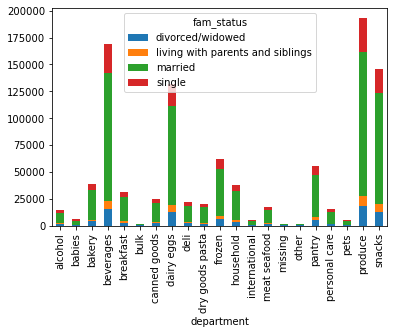

In [218]:
# Creating bar chart for family status and department

bar_fam_status_dept = dept_fam_crosstab.sort_index().plot(kind = 'bar', stacked = True)

In [219]:
#Export family status and department 

bar_fam_status_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_status_dept_crosstab.png'))

In [227]:
# Crosstab for department and income bracket

dept_income_crosstab = pd.crosstab(final_data['department'], final_data['Income Bracket'], dropna = False)

In [228]:
print(dept_income_crosstab)

Income Bracket   Low < 40k  Middle 40k-74k  Top 10 percent 170k+  \
department                                                         
alcohol               1046            3864                   675   
babies                  51            1769                   175   
bakery                3338           11800                  1103   
beverages            24115           56728                  2991   
breakfast             4832           10605                   586   
bulk                   337             517                     3   
canned goods          1215            6826                   780   
dairy eggs           13454           42739                  3374   
deli                  2340            6918                   573   
dry goods pasta        848            5752                   529   
frozen                3767           18357                  1881   
household             2929           11206                  1033   
international          352            1607      

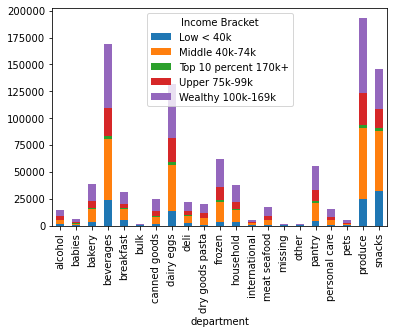

In [229]:
# Crosstab for department and income brackets 

bar_dept_income_crosstab = dept_income_crosstab.sort_index().plot(kind = 'bar', stacked = True)


In [230]:
#Export family status and income crosstab 

bar_dept_income_crosstab.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_income_crosstab.png'))

In [231]:
# Primary target customers lie between 40,000 and 169,000. Low income and very high income are not ideal target groups

In [232]:
# Crosstab for generation and income bracket

gen_income_crosstab = pd.crosstab(final_data['Generation'], final_data['Income Bracket'], dropna = False)

In [233]:
print(gen_income_crosstab)

Income Bracket          Low < 40k  Middle 40k-74k  Top 10 percent 170k+  \
Generation                                                                
Boomers 57-75               24197           54597                  6168   
Ge X 41-56                  25513           50525                  6032   
Gen Z 18-24                 17177           61611                  2663   
Millenials 25-40            42717          138544                  2133   
Silent Generation > 75      12623           22925                  5331   

Income Bracket          Upper 75k-99k  Wealthy 100k-169k  
Generation                                                
Boomers 57-75                   33662             168841  
Ge X 41-56                      26957             137728  
Gen Z 18-24                     27495               4104  
Millenials 25-40                60522               4506  
Silent Generation > 75          12444              50985  


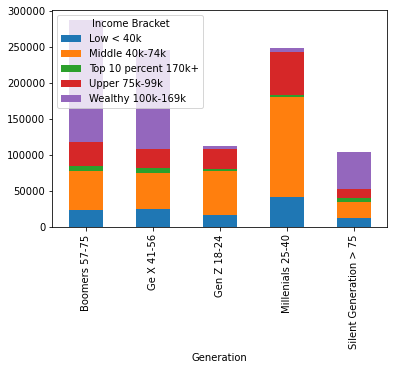

In [234]:
# Crosstab for generation and income brackets 

bar_gen_income_crosstab = gen_income_crosstab.sort_index().plot(kind = 'bar', stacked = True)

In [235]:
#Export generation and income bracket crosstab 

bar_gen_income_crosstab.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'gen_income_crosstab.png'))

In [236]:
# Following the crosstab analysis, it is clear that income groups between 40,000 to 170,000 are the main group.
# Married couples, between ages 25-60 are also the key target groups. 

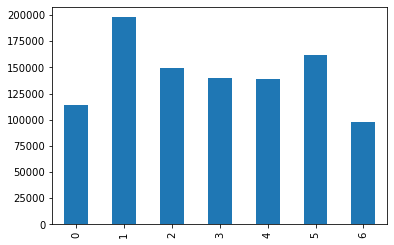

In [241]:
#-----Now analyzing busiest days of the week-----
busiest_days_bar = final_data['orders_days_of_week'].value_counts().sort_index().plot.bar()

busiest_days_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_days_bar.png'))

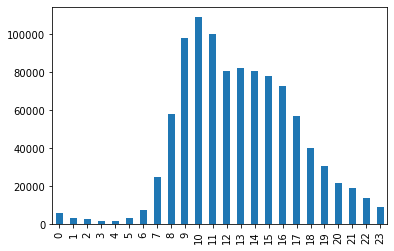

In [243]:
# Busiests hours of the day

busiest_hour_bar = final_data['order_time'].value_counts().sort_index().plot.bar()

busiest_hour_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'busiest_days_bar.png' ))

# 8. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [262]:
# aggregating age and income

agg_gen_income = final_data.groupby('age').agg({'income' : ['min', 'mean', 'max']})

In [263]:
agg_gen_income.to_clipboard()

In [264]:
# aggregating age and price

agg_age_price = final_data.groupby('age').agg({'prices' : ['min', 'mean', 'max']})

In [265]:
agg_age_price.to_clipboard()

In [266]:
# aggregating income bracket and prices 

agg_income_bracket_price = final_data.groupby('Income Bracket').agg({'prices' : ['min', 'mean', 'max']})

In [267]:
agg_income_bracket_price.to_clipboard()

In [268]:
# aggregating income bracket and age


agg_income_bracket_age = final_data.groupby('Income Bracket').agg({'age' : ['min', 'mean', 'max']})

In [269]:
agg_income_bracket_age.to_clipboard()

# 9. Customers by region and department

In [11]:
# Compare your customer profiles with regions and departments. Can you identify a link between them? 
# Customers may demonstrate different behaviors across regions, which could make this information important.

In [12]:
dept_region_crosstab = pd.crosstab(final_data['department'], final_data['region'], dropna = False)

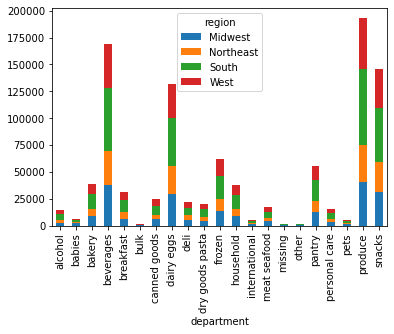

In [65]:
bar_dept_region_crosstab = dept_region_crosstab.plot(kind = 'bar', stacked = True)

In [66]:
path =  r'Users\peter\Documents\Instacart Basket Analysis 2022'

In [58]:
# From the above graph, it looks like the purchasing habits by region do not vary as greatly as one may expect
# To better observe any possible variations, I made use of a stacked bar chart.

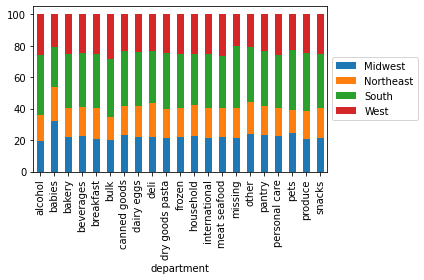

In [59]:
# Stacked bar chart by region and department

bar_dept_region_100 = dept_region_crosstab .apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [60]:
# Export stacked bar chart by region/department

bar_dept_region_100.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'dept_region_stacked.png' ))

FileNotFoundError: [Errno 2] No such file or directory: 'Users\\peter\\Documents\\Instacart Basket Analysis 2022\\04 Analysis\\Visualizations\\dept_region_stacked.png'

In [280]:
# Exporting final_data 

final_data.to_pickle(r'C:\Users\peter\Documents\Instacart Basket Analysis 2022\02 Data\Prepared Data\final_data.pkl')

# 10 Answering Key Questions

In [3]:
# Importing final_data 

final_data = pd.read_pickle(r'C:\Users\peter\Documents\Instacart Basket Analysis 2022\02 Data\Prepared Data\final_data.pkl')

Key Questions

1. The sales team needs to know what the busiest days of the week and hours of the day
are (i.e., the days and times with the most orders) in order to schedule ads at times
when there are fewer orders.

2. They also want to know whether there are particular times of the day when people spend
the most money, as this might inform the type of products they advertise at these times.

3. Instacart has a lot of products with different price tags. Marketing and sales want to use
simpler price range groupings to help direct their efforts.

4. Are there certain types of products that are more popular than others? The marketing
and sales teams want to know which departments have the highest frequency of product
orders.

5. The marketing and sales teams are particularly interested in the different types of
customers in their system and how their ordering behaviors differ. For example:
    - What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?
    - Are there differences in ordering habits based on a customer’s loyalty status?
    - Are there differences in ordering habits based on a customer’s region?
    - Is there a connection between age and family status in terms of ordering habits?

Note: Instacart is a real company that’s made their data available online. However, the contents of this project brief
have been fabricated for the purpose of this Achievement.

6. What different classifications does the demographic information suggest? Age?
Income? Certain types of goods? Family status?

7. What differences can you find in ordering habits of different customer profiles?
Consider the price of orders, the frequency of orders, the products customers are
ordering, and anything else you can think of.

1 + 2. The busiest days of the week are Saturday, Sunday, and Friday - with peak hours of spending being between 9 and 11 am (for the final_data). The Task 4.9 results indicated that 3pm afternoon was the busiest time. Our results here were based on the graphs above under Part 7 of this analysis. 

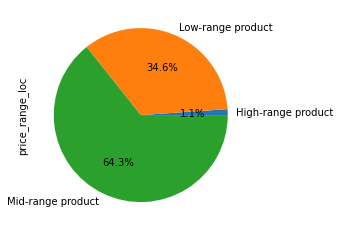

In [72]:
# 3. Products based on price range 

products_price_pie = final_data['price_range_loc'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')

3. Key product range will be mid-range and low-range items. High-range products only account for 1.1% of all products sold.

4. Top products sold are produce, dairy eggs, snacks, and beverages as seen under Part 6 of this analysis. 

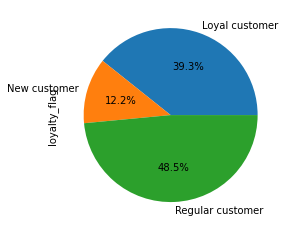

In [74]:
# 5a - Brand loyalty 

brand_loyalty_pie = final_data['loyalty_flag'].value_counts().sort_index().plot.pie(autopct = '%1.1f%%')

5a - Brand loyalty of loyal customers is approximately 39%, whereas regular customers account for nearly half. New customers is around 12% of all customers

In [75]:
# 5b loyalty status and spending flag

freq_flag_loyalty = pd.crosstab(final_data['frequency_flag'], final_data['loyalty_flag'], dropna = False)

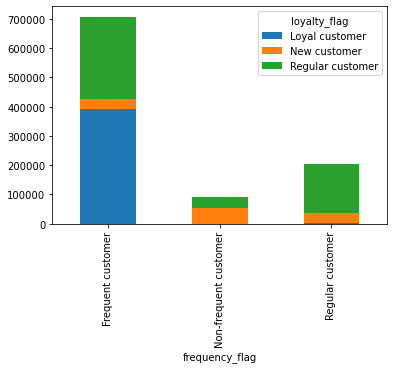

In [78]:
bar_freq_flag_loyalty = freq_flag_loyalty.plot(kind = 'bar', stacked = True)

5b - Results show that frequent customers who are loyal and regular spend the most. 

5c - Customers spend approximately the same (with very minor differences) regardless of their region based the 100% stacked bar graph within Part 9 of this analysis. 

5d -Based on the analysis done in Part 6 and 7, Boomers and Gen X tend to spend the the most, with married couples accounting for nearly 70% of all orders.

6+7. The results show that the target groups should be those who earn between 40,000 and 170,000 are married and belong to Gen X/Millenials/Boomers. The products they buy most are produce, dairy eggs, beverages, and snacks. These customers also tend to be regular and/or loyal customers. 